In [27]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
path = "/home/sam/projects/machine-learning/data/heart.csv"
with open(path, "r") as file:
    df = pd.read_csv(file)
    
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h4>One-hot encoding using Pandas</h4>

In [29]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

data = pd.get_dummies(data=df, prefix=cat_cols, columns=cat_cols)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [30]:
features = [x for x in data.columns if x not in 'HeartDisease']
print(features)
print(len(features))
print(data["HeartDisease"])

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
20
0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [35]:
X_train, X_val, y_train, y_val = train_test_split(
    data[features], 
    data["HeartDisease"],
    train_size=0.8,
    random_state=1
)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

734
734
184
184


In [36]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
852,43,120,177,0,120,2.5,False,True,True,False,False,False,True,False,False,False,True,False,True,False
121,52,125,272,0,139,0.0,True,False,False,False,True,False,False,True,False,True,False,False,False,True
664,65,150,225,0,114,1.0,True,False,True,False,False,False,True,False,False,True,False,False,True,False
187,41,120,237,1,138,1.0,False,True,True,False,False,False,False,True,False,False,True,False,True,False
108,50,140,129,0,135,0.0,False,True,True,False,False,False,False,True,False,True,False,False,False,True


In [37]:
y_train.head()

852    1
121    0
664    1
187    1
108    0
Name: HeartDisease, dtype: int64

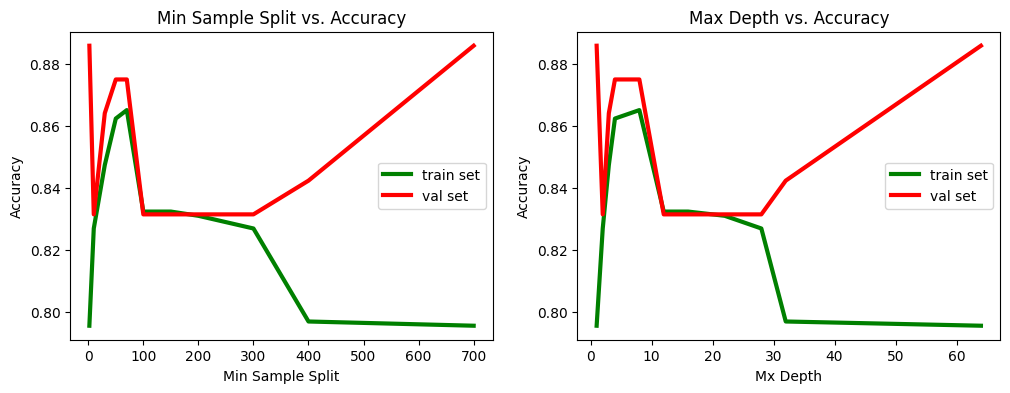

In [39]:
sp = [2,10, 30, 50, 70, 100, 150,  200, 300, 400, 700]
md = [1, 2, 3, 4, 8, 12, 16, 22, 28, 32, 64]

train_accuracy = []
val_accuracy = []

for i in range(len(sp)):
    model = DecisionTreeClassifier(min_samples_split=sp[i],max_depth=md[i], random_state=1)
    model.fit(X_train, y_train)
    train_predict = model.predict(X_train)
    val_predict = model.predict(X_val)
    train_accuracy.append(accuracy_score(y_train, train_predict))
    val_accuracy.append(accuracy_score(y_val, val_predict))
    
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(min_samples_split_list, train_accuracy, color="green", linewidth=3, label="train set")
plt.plot(min_samples_split_list, val_accuracy, color="red", linewidth=3, label="val set")
plt.ylabel("Accuracy")
plt.xlabel("Min Sample Split")
plt.title("Min Sample Split vs. Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(max_depth_list, train_accuracy, color="green", linewidth=3, label="train set")
plt.plot(max_depth_list, val_accuracy, color="red", linewidth=3, label="val set")
plt.ylabel("Accuracy")
plt.xlabel("Mx Depth")
plt.title("Max Depth vs. Accuracy")
plt.legend()
plt.show()
    


In [40]:
model = DecisionTreeClassifier(min_samples_split=50, max_depth=8, random_state=1)
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
print(accuracy_score(y_train, train_predict))
print(accuracy_score(y_val, val_predict))

0.8651226158038147
0.875


In [ ]:
sp = [2,10, 30, 50, 100, 200, 300, 700] # minimum number of samples required to split an internal node
md = [1, 2, 3, 4, 8, 16, 32, 64] # maximum depth of the tree
est = [10, 50, 100, 500] #  number of Decision Trees
train_acc = []
val_acc = []

for i in range(len(est)):
    for s in sp:
        for m in md:
            model = RandomForestClassifier(
                min_samples_split=s, 
                max_depth=m,
                n_estimators= est[i],
                random_state=1
            )
            model.fit(X_train, y_train)
            test_predict = model.predict(X_train)
            val_predict = model.predict(X_val)
            train_acc.append(([s, m, i], accuracy_score(y_train, train_predict)))
            val_acc.append(([s, m, i], accuracy_score(y_val, val_predict)))

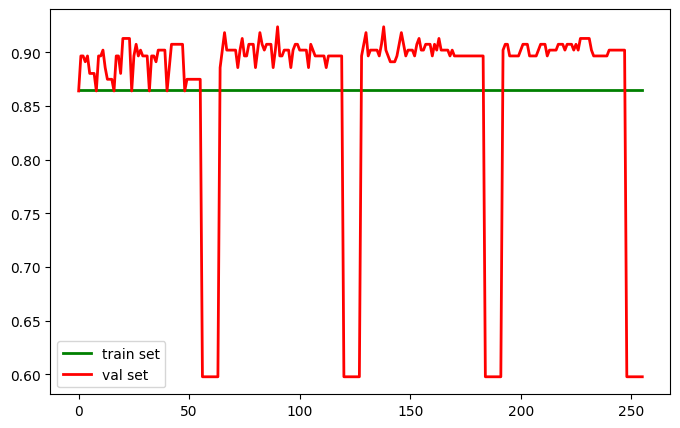

In [45]:
plt.figure(figsize=(8, 5))
plt.plot([t[1] for t in train_acc], color="green", linewidth=2, label="train set")
plt.plot([v[1] for v in val_acc], color="red", linewidth=2, label="val set")

plt.legend()
plt.show()

In [47]:
print(val_acc[90])

([50, 3, 1], 0.9239130434782609)


In [50]:
model = RandomForestClassifier(
                min_samples_split=50, 
                max_depth=3,
                n_estimators=1,
                random_state=1
            )
model.fit(X_train, y_train)

yt_pred = model.predict(X_train)
yv_pred = model.predict(X_val)
print(accuracy_score(y_train, yt_pred))
print(accuracy_score(y_val, yv_pred))

0.8133514986376021
0.842391304347826


In [51]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

xgb_model = XGBClassifier(
    n_estimators = 500, 
    learning_rate = 0.1,
    verbosity = 1, 
    random_state = 1)
xgb_model.fit(
    X_train_fit,
    y_train_fit, 
    eval_set = [(X_train_eval,y_train_eval)], 
    early_stopping_rounds = 10
)


[0]	validation_0-logloss:0.63700
[1]	validation_0-logloss:0.59838
[2]	validation_0-logloss:0.56042
[3]	validation_0-logloss:0.53344
[4]	validation_0-logloss:0.50898
[5]	validation_0-logloss:0.48643
[6]	validation_0-logloss:0.46629
[7]	validation_0-logloss:0.45245
[8]	validation_0-logloss:0.43828
[9]	validation_0-logloss:0.42661
[10]	validation_0-logloss:0.41796
[11]	validation_0-logloss:0.41056


/home/sam/projects/venv/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.40351
[13]	validation_0-logloss:0.39569
[14]	validation_0-logloss:0.38810
[15]	validation_0-logloss:0.38213
[16]	validation_0-logloss:0.37869
[17]	validation_0-logloss:0.37325
[18]	validation_0-logloss:0.36962
[19]	validation_0-logloss:0.36861
[20]	validation_0-logloss:0.36540
[21]	validation_0-logloss:0.36614
[22]	validation_0-logloss:0.36648
[23]	validation_0-logloss:0.36690
[24]	validation_0-logloss:0.36565
[25]	validation_0-logloss:0.36765
[26]	validation_0-logloss:0.36573
[27]	validation_0-logloss:0.36738
[28]	validation_0-logloss:0.36670
[29]	validation_0-logloss:0.36759
[30]	validation_0-logloss:0.36763


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [52]:
xgb_model.best_iteration

20

In [53]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9346
Metrics test:
	Accuracy score: 0.9022
